2D data - **KNN**

In [2]:
x_train = [[1,1],[2,3],[3,2],[2,2],[1,2]]
y_train = ['a','a','b','b','a']

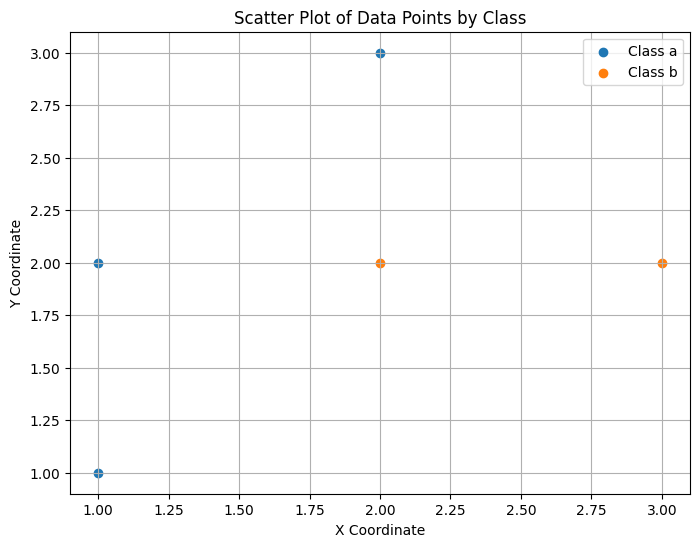

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Prepare data for plotting
df = pd.DataFrame({
    'x_coord': [p[0] for p in x_train],
    'y_coord': [p[1] for p in x_train],
    'class': y_train
})

# Create the scatter plot
plt.figure(figsize=(8, 6))
for class_name, group in df.groupby('class'):
    plt.scatter(group['x_coord'], group['y_coord'], label=f'Class {class_name}')

plt.title('Scatter Plot of Data Points by Class')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.grid(True)
plt.show()

In [36]:
x_test = [[1.5,1.5], [1.5, 1.25], [2.25, 2.25], [1.25, 3], [2.75, 2.25], [1.6, 2.4]]

In [40]:
def knn(x_train,y_train,x_test,k):
  distance = []

  for i in range(len(x_train)):
    x1 = x_train[i][0]
    y1 = x_train[i][1]
    x2 = x_test[0]
    y2 = x_test[1]
    dis = ((x1-x2)**2 + (y1-y2)**2)**0.5

    distance.append((dis, y_train[i]))

  distance.sort()

  k_nearest = distance[:k]

  votes = {}

  for _, label in k_nearest:
    votes[label] = votes.get(label, 0) + 1

  max_vote = 0
  for label in votes:
      if votes[label] > max_vote:
          max_vote = votes[label]
          y_pred = label


  return y_pred

In [37]:
def multi_knn(x_train, y_train, x_test_ls, k):
  pred = []

  for i in x_test_ls:
    pred.append(knn(x_train, y_train, i, k))

  return pred

In [42]:
print(multi_knn(x_train, y_train, x_test, 3))

['a', 'a', 'b', 'a', 'b', 'a']


**Linear** **Regression**

In [1]:
import numpy as np

class LinearRegressionGD:
    """
    Linear Regression แบบหลายมิติ ใช้ Gradient Descent
    """

    def __init__(self, learning_rate=0.1, n_iterations=1000):
        self.lr = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.losses = []

    def fit(self, X, y):
        """
        เทรนโมเดล
        X: shape (n_samples, n_features)
        y: shape (n_samples,)
        """
        n_samples, n_features = X.shape

        # Initialize weights และ bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient Descent
        for i in range(self.n_iterations):
            # ทำนายค่า: y_pred = X @ w + b
            y_pred = np.dot(X, self.weights) + self.bias

            # คำนวณ MSE loss
            loss = np.mean((y - y_pred) ** 2)
            self.losses.append(loss)

            # คำนวณ gradients
            dw = -(2 / n_samples) * np.dot(X.T, (y - y_pred))
            db = -(2 / n_samples) * np.sum(y - y_pred)

            # Update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            # แสดงผลทุก 100 iterations
            if (i + 1) % 5 == 0:
                print(f"Iteration {i+1}: Loss = {loss:.4f}")

        return self

    def predict(self, X):
        """ทำนายค่า"""
        return np.dot(X, self.weights) + self.bias

    def mse(self, y_true, y_pred):
        """คำนวณ Mean Squared Error"""
        return np.mean((y_true - y_pred) ** 2)

    def r2_score(self, X, y):
        """คำนวณ R² score"""
        y_pred = self.predict(X)
        ss_res = np.sum((y - y_pred) ** 2)
        ss_tot = np.sum((y - np.mean(y)) ** 2)
        return 1 - (ss_res / ss_tot)


# ===== ตัวอย่างการใช้งาน =====

# สร้างข้อมูลตัวอย่าง (3 features)
np.random.seed(42)
n_samples = 100
n_features = 3

X = np.random.randn(n_samples, n_features)
true_weights = np.array([3.5, -2.0, 1.5])
true_bias = 5.0
y = np.dot(X, true_weights) + true_bias + np.random.randn(n_samples) * 0.5

print("=" * 50)
print("Linear Regression with Gradient Descent")
print("=" * 50)
print(f"ข้อมูล: {n_samples} samples, {n_features} features")
print(f"True weights: {true_weights}")
print(f"True bias: {true_bias}")
print()

# เทรนโมเดล
model = LinearRegressionGD(learning_rate=0.2, n_iterations=1000)
model.fit(X, y)

print()
print("=" * 50)
print("ผลลัพธ์:")
print("=" * 50)
print(f"Learned weights: {model.weights}")
print(f"Learned bias: {model.bias:.4f}")
print()

# ทำนายและประเมินผล
y_pred = model.predict(X)
mse = model.mse(y, y_pred)
r2 = model.r2_score(X, y)

print(f"MSE: {mse:.4f}")
print(f"R² Score: {r2:.4f}")
print()

# แสดงตัวอย่างการทำนาย
print("ตัวอย่างการทำนาย (5 samples แรก):")
print(f"{'True':>10} {'Predicted':>10} {'Error':>10}")
print("-" * 35)
for i in range(5):
    error = abs(y[i] - y_pred[i])
    print(f"{y[i]:10.4f} {y_pred[i]:10.4f} {error:10.4f}")

Linear Regression with Gradient Descent
ข้อมูล: 100 samples, 3 features
True weights: [ 3.5 -2.   1.5]
True bias: 5.0

Iteration 5: Loss = 0.8706
Iteration 10: Loss = 0.2096
Iteration 15: Loss = 0.1902
Iteration 20: Loss = 0.1892
Iteration 25: Loss = 0.1892
Iteration 30: Loss = 0.1892
Iteration 35: Loss = 0.1892
Iteration 40: Loss = 0.1892
Iteration 45: Loss = 0.1892
Iteration 50: Loss = 0.1892
Iteration 55: Loss = 0.1892
Iteration 60: Loss = 0.1892
Iteration 65: Loss = 0.1892
Iteration 70: Loss = 0.1892
Iteration 75: Loss = 0.1892
Iteration 80: Loss = 0.1892
Iteration 85: Loss = 0.1892
Iteration 90: Loss = 0.1892
Iteration 95: Loss = 0.1892
Iteration 100: Loss = 0.1892
Iteration 105: Loss = 0.1892
Iteration 110: Loss = 0.1892
Iteration 115: Loss = 0.1892
Iteration 120: Loss = 0.1892
Iteration 125: Loss = 0.1892
Iteration 130: Loss = 0.1892
Iteration 135: Loss = 0.1892
Iteration 140: Loss = 0.1892
Iteration 145: Loss = 0.1892
Iteration 150: Loss = 0.1892
Iteration 155: Loss = 0.1892
It